<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/KNN_Model_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Model Optimization

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("gene_expression.csv")

In [4]:
y = df["Cancer Present"]
X = df.drop("Cancer Present", axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Model Optimization

In [7]:
Error_Rates = []

In [11]:
for i in range(1,30):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)

  error = 1 - accuracy_score(y_test,y_pred)

  Error_Rates.append(error)

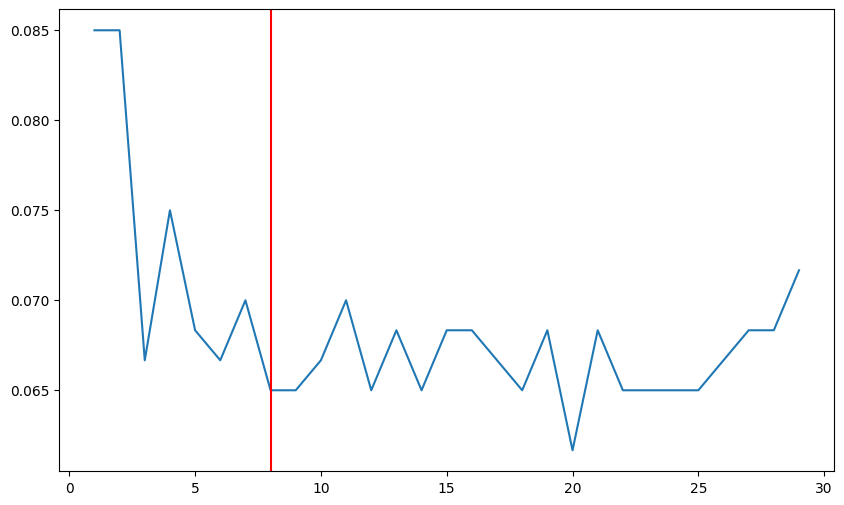

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),Error_Rates)
plt.axvline(x=8, color='r')

##Pipeline GridSearch

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
help(KNeighborsClassifier())

In [22]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [("scaler", scaler),("knn", knn)]

pipe = Pipeline(operations)

k_values = list(range(1,20))

parameter_grid = {"knn__n_neighbors" :k_values}

cv_classifier = GridSearchCV(pipe, parameter_grid, cv=5, scoring="accuracy")

In [23]:
cv_classifier.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [24]:
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [25]:
y_preds = cv_classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       294
           1       0.94      0.96      0.95       306

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [28]:
new_patient = [[2.4,6.0]]

In [29]:
cv_classifier.predict(new_patient)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])